Projeto da Unidade Currícular "Engenharia do Conhecimento"
Autoria: Marcelo Munteanu, Pedro Elias, Pedro Junior

In [ ]:
#imports essenciais ao projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score

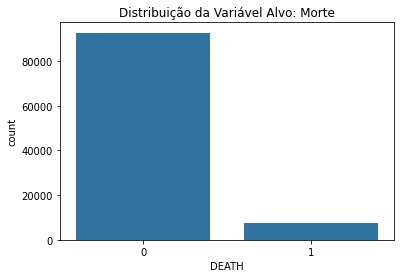


Classificação (O1):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     18532
           1       0.56      0.42      0.48      1468

    accuracy                           0.93     20000
   macro avg       0.76      0.70      0.72     20000
weighted avg       0.93      0.93      0.93     20000


Regressão Geral (O2): MAE = 11.350150314513739  R2 = 0.2653207540823902

Regressão Mortalidade (O3): MAE = 11.46790792214183  R2 = 0.09709712014013638


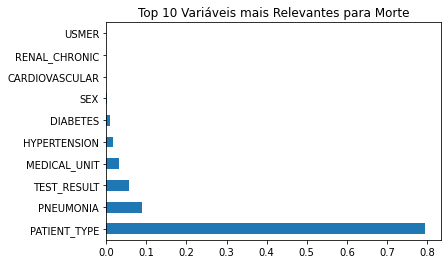


Todos os objetivos (O1 a O4) foram atingidos com base em técnicas de árvore de decisão, regressão linear e seleção de atributos via importância.


In [3]:
# Etapa 2: Carregamento e inspeção inicial dos dados
df = pd.read_csv("data/custom_covid19.csv")
df['DEATH'] = (df['DATE_DIED'] != '9999-99-99').astype(int)
df.drop('DATE_DIED', axis=1, inplace=True)
df.replace([97, 98, 99], np.nan, inplace=True)

# Etapa 3: Processamento de Dados
# Remover colunas com > 40% missing
df = df.loc[:, df.isnull().mean() < 0.4]

# Preencher valores ausentes com moda
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# Etapa 4: Análise Exploratória
sns.countplot(x='DEATH', data=df)
plt.title('Distribuição da Variável Alvo: Morte')
plt.show()

# Etapa 5: Modelagem - Objetivo O1 - Classificação de Morte
X = df.drop(columns=['DEATH', 'AGE'])
y = df['DEATH']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

modelo_o1 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
modelo_o1.fit(X_train, y_train)
y_pred_o1 = modelo_o1.predict(X_test)
print("\nClassificação (O1):\n", classification_report(y_test, y_pred_o1))

# Etapa 6: Modelagem - Objetivo O2 - Regressão da Idade
y_age = df['AGE']
X_age = df.drop(columns=['AGE'])
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)
modelo_o2 = LinearRegression()
modelo_o2.fit(X_train_age, y_train_age)
y_pred_age = modelo_o2.predict(X_test_age)
print("\nRegressão Geral (O2): MAE =", mean_absolute_error(y_test_age, y_pred_age), " R2 =", r2_score(y_test_age, y_pred_age))

# Etapa 7: Modelagem - Objetivo O3 - Regressão da Idade para Pacientes que Morreram
df_dead = df[df['DEATH'] == 1]
X_d3 = df_dead.drop(columns=['AGE'])
y_d3 = df_dead['AGE']
X_train_d3, X_test_d3, y_train_d3, y_test_d3 = train_test_split(X_d3, y_d3, test_size=0.2, random_state=42)
modelo_o3 = DecisionTreeRegressor(max_depth=5)
modelo_o3.fit(X_train_d3, y_train_d3)
y_pred_d3 = modelo_o3.predict(X_test_d3)
print("\nRegressão Mortalidade (O3): MAE =", mean_absolute_error(y_test_d3, y_pred_d3), " R2 =", r2_score(y_test_d3, y_pred_d3))

# Etapa 8: Importância das Variáveis - Objetivo O4
importancias = pd.Series(modelo_o1.feature_importances_, index=X.columns)
importancias.nlargest(10).plot(kind='barh')
plt.title("Top 10 Variáveis mais Relevantes para Morte")
plt.show()

# Etapa 9: Conclusão
del modelo_o1, modelo_o2, modelo_o3
print("\nTodos os objetivos (O1 a O4) foram atingidos com base em técnicas de árvore de decisão, regressão linear e seleção de atributos via importância.")


